In [1]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('ggplot')

c:\Users\Morgan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
public_trans_full20 = pd.read_csv('../data/2020_metrics.csv')
public_trans_full20.head(5)

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
0,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",HR,...,NaN,"324,782,077",NaN,No,NaN,NaN,NaN,Hide questionable data tags,NaN,NaN
1,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",CB,...,NaN,"8,690,192",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
2,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",MB,...,W,"80,118,986",NaN,Yes,NaN,2.0,NaN,1,NaN,2.0
3,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",RB,...,W,"3,151,031",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",DR,...,NaN,"24,052,883",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
public_trans_full20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 45 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Agency                                                                   3717 non-null   object 
 1   City                                                                     3712 non-null   object 
 2   State                                                                    3717 non-null   object 
 3   Legacy NTD ID                                                            3389 non-null   object 
 4   NTD ID                                                                   3717 non-null   object 
 5   Organization Type                                                        3717 non-null   object 
 6   Reporter Type                                                           

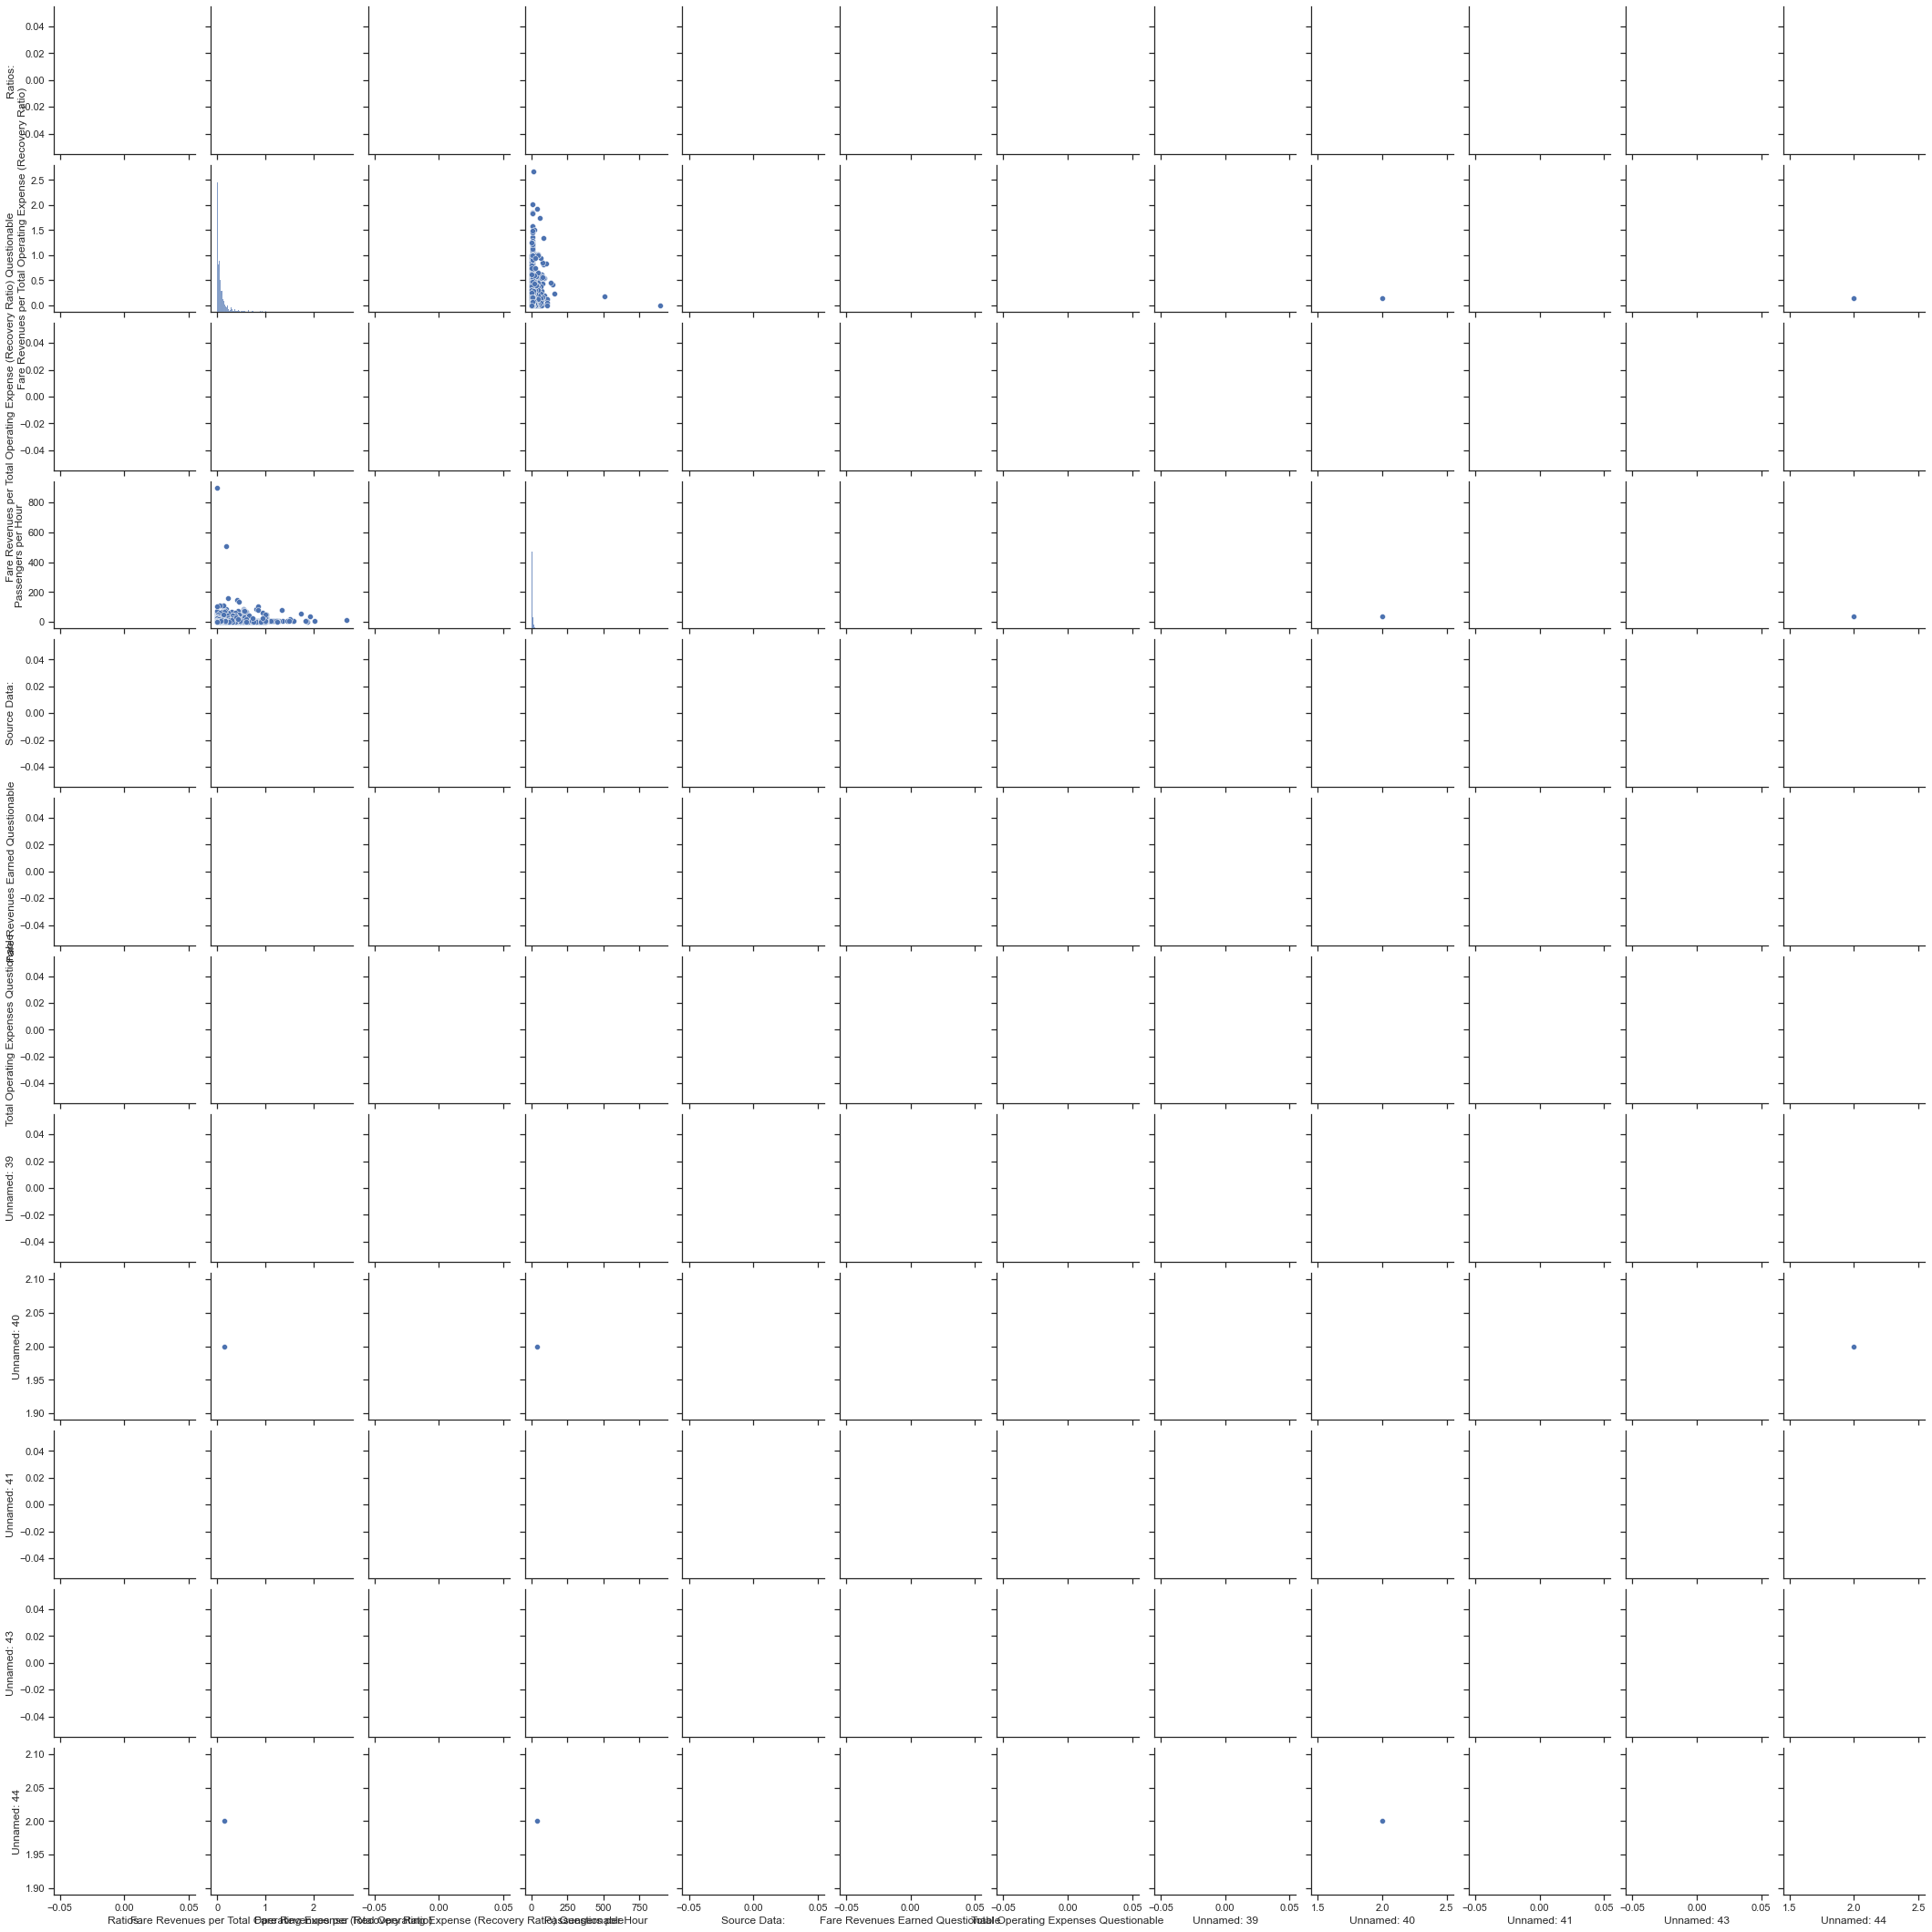

In [4]:
sns.set_theme(style='ticks')
sns.pairplot(public_trans_full20)

In [5]:
filtered_test_df = public_trans_full20[public_trans_full20['Mode'].isin(['CR', 'CB', 'RB', 'MB'])]
filtered_test_df.head(5)

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
1,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",CB,...,NaN,"8,690,192",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
2,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",MB,...,W,"80,118,986",NaN,Yes,NaN,2.0,NaN,1,NaN,2.0
3,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",RB,...,W,"3,151,031",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
5,New Jersey Transit Corporation,Newark,NJ,2080,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,"18,351,295","3,646",CR,...,NaN,"54,301,350",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
8,New Jersey Transit Corporation,Newark,NJ,2080,20080,Other Publicly-Owned or Privately Chartered Co...,Full Reporter,"18,351,295","3,646",MB,...,NaN,"69,544,902",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filtered_test_df = filtered_test_df.loc[filtered_test_df['State'] == 'NY']
filtered_test_df.head(5)

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Passenger Miles Questionable,Vehicle Revenue Miles,Vehicle Revenue Miles Questionable,Any data questionable?,Unnamed: 39,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44
1,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",CB,...,NaN,"8,690,192",NaN,No,NaN,NaN,NaN,Show questionable data tags,NaN,NaN
2,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",MB,...,W,"80,118,986",NaN,Yes,NaN,2.0,NaN,1,NaN,2.0
3,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",RB,...,W,"3,151,031",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
95,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,2078,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","1,133",MB,...,NaN,"93,785",NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
97,"Metro-North Commuter Railroad Company, dba: MT...",New York,NY,2078,20078,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","1,133",CR,...,W,"48,719,168",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
city_county =pd.read_csv('../data/ny_city_county.csv')

In [8]:
public_trans_2020_with_county = filtered_test_df.merge(
    city_county,
    how='left',
    left_on='City',
    right_on='City'
)

<function matplotlib.pyplot.show(close=None, block=None)>

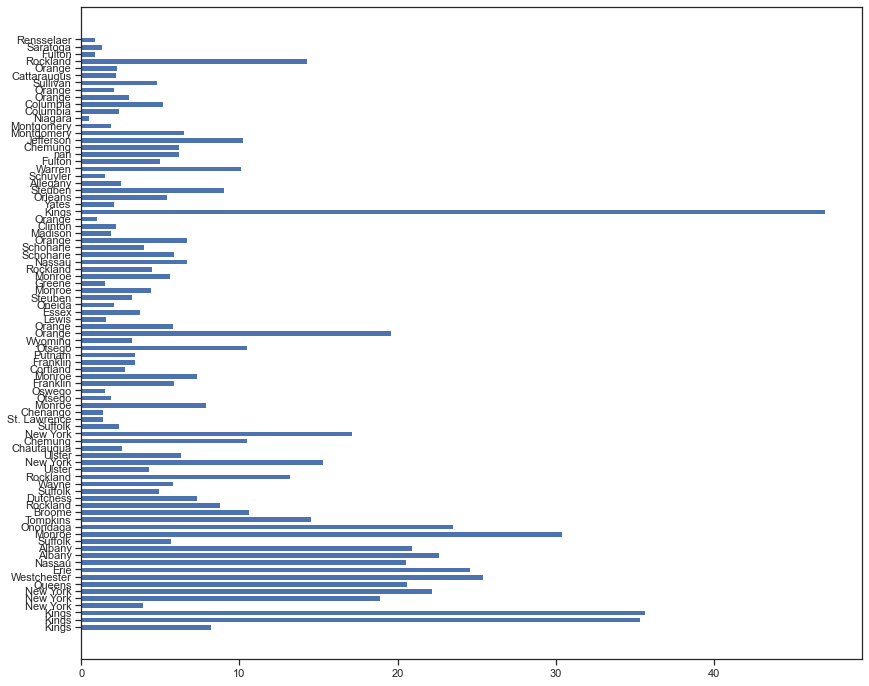

In [9]:
fig, ax = plt.subplots(facecolor='white', figsize=(14,12))
x = public_trans_2020_with_county['County']
y = public_trans_2020_with_county['Passengers per Hour']
y_pos = np.arange(len(x))

plt.barh(y_pos, y)
plt.yticks(y_pos, x)

plt.show

In [10]:
public_trans_2020_with_county['MB'] = public_trans_2020_with_county['Mode'] == 'MB'
public_trans_2020_with_county['CB'] = public_trans_2020_with_county['Mode'] == 'CB'
public_trans_2020_with_county['RB'] = public_trans_2020_with_county['Mode'] == 'RB'
public_trans_2020_with_county['CR'] = public_trans_2020_with_county['Mode'] == 'CR'
public_trans_2020_with_county.head(3)

,Agency,City,State,Legacy NTD ID,NTD ID,Organization Type,Reporter Type,Primary UZA\n Population,Agency VOMS,Mode,...,Unnamed: 40,Unnamed: 41,1,Unnamed: 43,Unnamed: 44,County,MB,CB,RB,CR
0,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",CB,...,NaN,NaN,Show questionable data tags,NaN,NaN,Kings,False,True,False,False
1,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",MB,...,2.0,NaN,1,NaN,2.0,Kings,True,False,False,False
2,MTA New York City Transit,Brooklyn,NY,2008,20008,"Subsidiary Unit of a Transit Agency, Reporting...",Full Reporter,"18,351,295","10,427",RB,...,NaN,NaN,NaN,NaN,NaN,Kings,False,False,True,False


In [11]:
# Turn True False in below columns to 0 or 1
public_trans_2020_with_county['CR'] = [int(item) for item in public_trans_2020_with_county['CR']]
public_trans_2020_with_county['RB'] = [int(item) for item in public_trans_2020_with_county['RB']]
public_trans_2020_with_county['CB'] = [int(item) for item in public_trans_2020_with_county['CB']]
public_trans_2020_with_county['MB'] = [int(item) for item in public_trans_2020_with_county['MB']]

In [12]:
county_trans = public_trans_2020_with_county.groupby(
    'County', as_index=False)[['CR', 'RB', 'CB', 'MB']].sum()
county_trans['Total'] = county_trans['CR'] + county_trans['CB'] + county_trans['RB'] +county_trans['MB']
county_trans

,County,CR,RB,CB,MB,Total
0,Albany,0,0,1,1,2
1,Allegany,0,0,0,1,1
2,Broome,0,0,0,1,1
3,Cattaraugus,0,0,0,1,1
4,Chautauqua,0,0,0,1,1
5,Chemung,0,0,0,2,2
6,Chenango,0,0,0,1,1
7,Clinton,0,0,0,1,1
8,Columbia,0,0,1,1,2
9,Cortland,0,0,0,1,1


In [13]:
import plotly.express as px
import plotly.graph_objects as go
import json
import requests
# Reading in geojson for graphing and county numeric codes
# ny_counties_json = pd.read_json('new.geojson')

with open('new.geojson') as file:
    ny_geojson = json.load(file)

ny_counties_fips_codes_csv = pd.read_csv('../data/ny_counties_fips_codes.csv')
ny_counties_fips_codes_csv.columns = ny_counties_fips_codes_csv.columns.str.replace(' ','_')
ny_counties_fips_codes_csv.head(2)

,County_Name,State_FIPS,County_Code,County_FIPS,ZIP_Code,File_Date
0,Albany,36,1,36001,12007,7/25/2007
1,Allegany,36,3,36003,14024,7/25/2007


In [15]:
ny_counties_fips_codes_csv['County_FIPS'] = ny_counties_fips_codes_csv.County_FIPS.astype(str)

In [16]:
# Creating new column with the last three digits of they county code
ny_counties_fips_codes_csv['Three Digit County Code'] = ny_counties_fips_codes_csv['County_FIPS'].str[2:5]
ny_counties_fips_codes_csv['County'] = ny_counties_fips_codes_csv['County_Name']
ny_counties_fips_codes_csv.head(5)

,County_Name,State_FIPS,County_Code,County_FIPS,ZIP_Code,File_Date,Three Digit County Code,County
0,Albany,36,1,36001,12007,7/25/2007,001,Albany
1,Allegany,36,3,36003,14024,7/25/2007,003,Allegany
2,Bronx,36,5,36005,10451,7/25/2007,005,Bronx
3,Broome,36,7,36007,13730,7/25/2007,007,Broome
4,Cattaraugus,36,9,36009,14009,7/25/2007,009,Cattaraugus


In [17]:
county_trans_map = pd.merge(county_trans, ny_counties_fips_codes_csv, on=['County'])
county_trans_map

,County,CR,RB,CB,MB,Total,County_Name,State_FIPS,County_Code,County_FIPS,ZIP_Code,File_Date,Three Digit County Code
0,Albany,0,0,1,1,2,Albany,36,1,36001,12007,7/25/2007,001
1,Allegany,0,0,0,1,1,Allegany,36,3,36003,14024,7/25/2007,003
2,Broome,0,0,0,1,1,Broome,36,7,36007,13730,7/25/2007,007
3,Cattaraugus,0,0,0,1,1,Cattaraugus,36,9,36009,14009,7/25/2007,009
4,Chautauqua,0,0,0,1,1,Chautauqua,36,13,36013,14048,7/25/2007,013
5,Chemung,0,0,0,2,2,Chemung,36,15,36015,14805,7/25/2007,015
6,Chenango,0,0,0,1,1,Chenango,36,17,36017,13040,7/25/2007,017
7,Clinton,0,0,0,1,1,Clinton,36,19,36019,12901,7/25/2007,019
8,Columbia,0,0,1,1,2,Columbia,36,21,36021,12017,7/25/2007,021
9,Cortland,0,0,0,1,1,Cortland,36,23,36023,13040,7/25/2007,023


In [18]:
county_trans_map['Three Digit County Code'] = county_trans_map['Three Digit County Code'].astype(str)
county_trans_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   County                   49 non-null     object
 1   CR                       49 non-null     int64 
 2   RB                       49 non-null     int64 
 3   CB                       49 non-null     int64 
 4   MB                       49 non-null     int64 
 5   Total                    49 non-null     int64 
 6   County_Name              49 non-null     object
 7   State_FIPS               49 non-null     int64 
 8   County_Code              49 non-null     int64 
 9   County_FIPS              49 non-null     object
 10  ZIP_Code                 49 non-null     int64 
 11  File_Date                49 non-null     object
 12  Three Digit County Code  49 non-null     object
dtypes: int64(8), object(5)
memory usage: 5.4+ KB


In [19]:
ny_county_id_map = {}
for feature in ny_geojson['features']:
    feature['id'] = feature['properties']['county_fip']
    ny_county_id_map[feature['properties']['name']] = feature['id']

In [20]:
# New York Crime Rate
fig = px.choropleth(county_trans_map, geojson= ny_geojson, color='Total', locations='Three Digit County Code')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [1]:
county_trans_miles = public_trans_2020_with_county.groupby(
    'County', as_index=False)['Passenger Miles'].sum()
county_trans_miles

NameError: name 'public_trans_2020_with_county' is not defined